In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Report-audios'

In [ ]:
data = pd.DataFrame(columns=['label', 'path'])

In [ ]:
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    for filename in os.listdir(label_path):
        if filename.endswith('.wav'):
            filepath = os.path.join(label_path, filename)
            data = data.append({'label': label, 'path': filepath}, ignore_index=True)

data.to_csv('audio_data.csv', index=False)

<ipython-input-59-432552e2de02>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'label': label, 'path': filepath}, ignore_index=True)
<ipython-input-59-432552e2de02>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'label': label, 'path': filepath}, ignore_index=True)
<ipython-input-59-432552e2de02>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'label': label, 'path': filepath}, ignore_index=True)
<ipython-input-59-432552e2de02>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'label': label, 'path': filepath}, ignore_index=True)
<ipython-input-59-432552

In [ ]:

df = pd.read_csv('audio_data.csv')
df.head()

,label,path
0,F,/content/drive/MyDrive/Report-audios/F/PTT-202...
1,F,/content/drive/MyDrive/Report-audios/F/PTT-202...
2,F,/content/drive/MyDrive/Report-audios/F/PTT-202...
3,F,/content/drive/MyDrive/Report-audios/F/PTT-202...
4,F,/content/drive/MyDrive/Report-audios/F/PTT-202...


In [ ]:
df['label'].value_counts()

F    165
L    165
Z    165
O    165
Name: label, dtype: int64

In [ ]:
def waveplot(data,sr,optotype):
  plt.figure(figsize=(10,4))
  plt.title(optotype,size=20)
  librosa.display.waveplot(data,sr=sr)
  plt.show()

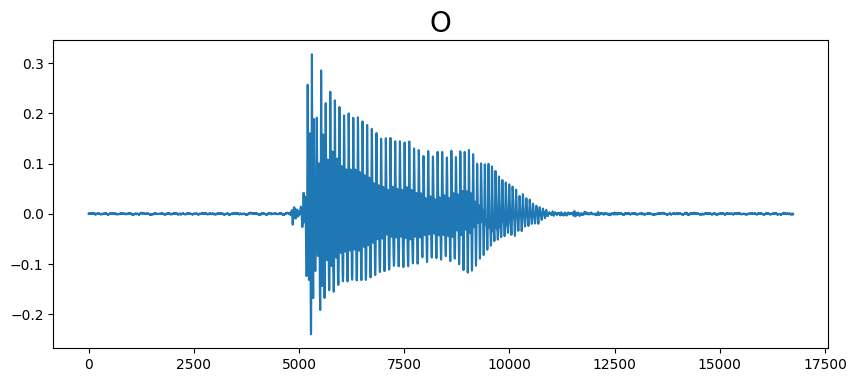

In [ ]:
optotype = 'O'
path = np.array(df['path'][df['label']==optotype])[33]
data, sampling_rate = librosa.load(path)
plt.figure(figsize=(10,4))
plt.title(optotype,size=20)
plt.plot(data)
plt.show()
Audio(path)

In [ ]:

mfccs=librosa.feature.mfcc(y=data, sr=sampling_rate,n_mfcc=40)
print(mfccs.shape)

(40, 33)


In [ ]:
mfccs

array([[-5.8601477e+02, -5.6601672e+02, -5.6524988e+02, ...,
        -5.6939722e+02, -5.7134149e+02, -5.7493945e+02],
       [ 6.1842758e+01,  7.7694580e+01,  8.3814209e+01, ...,
         7.8311752e+01,  7.7488091e+01,  7.3913475e+01],
       [ 3.0088013e+01,  3.0300190e+01,  3.5993240e+01, ...,
         3.4817764e+01,  3.3772972e+01,  3.3007946e+01],
       ...,
       [-4.3664494e+00, -6.6189356e+00, -4.7775249e+00, ...,
         1.0310117e+00, -8.6472964e-01, -1.8828280e+00],
       [-2.1047945e+00, -5.2709136e+00, -6.0909557e+00, ...,
        -1.3165140e+00, -3.9587717e+00, -7.2100291e+00],
       [ 5.3846087e+00, -3.0636680e-01, -3.6146851e+00, ...,
        -1.7705622e+00, -4.9766879e+00, -6.5679221e+00]], dtype=float32)

In [ ]:
##Deploying CNN Model

In [ ]:

max_pad_len = 85


X_mfcc = []
label1 = []

def extract_mfcc(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

    return mfccs


In [ ]:


X_mfcc = []
label1 = []

for i in range(len(df)):
    x = extract_mfcc(df['path'][i])
    X_mfcc.append(x)
    y = df['label'][i]
    label1.append(y)


In [ ]:
X_mfcc

[array([[-20.637106  , -19.081797  , -17.960695  , ...,   0.07547063,
           0.07547063,   0.07547063],
        [  3.0419555 ,   3.1225457 ,   3.2673697 , ...,   0.07547063,
           0.07547063,   0.07547063],
        [  0.53085226,  -0.36671305,  -0.8585446 , ...,   0.07547063,
           0.07547063,   0.07547063],
        ...,
        [  0.1554852 ,   0.1559939 ,   0.07773161, ...,   0.07547063,
           0.07547063,   0.07547063],
        [  0.08143256,  -0.10754578,  -0.0355963 , ...,   0.07547063,
           0.07547063,   0.07547063],
        [ -0.18627523,  -0.2615076 ,  -0.3179954 , ...,   0.07547063,
           0.07547063,   0.07547063]], dtype=float32),
 array([[-2.3226109e+01, -2.0998814e+01, -1.4252282e+01, ...,
          5.7128388e-02,  5.7128388e-02,  5.7128388e-02],
        [ 3.4889519e+00,  3.9756236e+00,  7.0241041e+00, ...,
          5.7128388e-02,  5.7128388e-02,  5.7128388e-02],
        [-4.3073705e-01, -9.8991132e-01, -3.1773486e+00, ...,
          5.7128388e

In [ ]:
extracted_features_df= pd.DataFrame({'features': X_mfcc, 'class': label1})

In [ ]:
extracted_features_df.head(187)

,features,class
0,"[[-20.637106, -19.081797, -17.960695, -18.5285...",F
1,"[[-23.226109, -20.998814, -14.252282, -11.2596...",F
2,"[[-14.472942, -14.40584, -14.348367, -14.41517...",F
3,"[[-12.63718, -11.707342, -11.583222, -11.70598...",F
4,"[[-11.742679, -11.12476, -11.12614, -11.18935,...",F
...,...,...
182,"[[-12.090434, -11.967429, -11.95484, -11.92684...",L
183,"[[-14.099287, -13.86513, -14.024719, -14.10031...",L
184,"[[-13.640769, -13.014059, -12.773652, -11.3748...",L
185,"[[-11.831976, -11.475233, -11.690619, -11.9381...",L


In [ ]:
X=np.array(extracted_features_df['features'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(660, 40, 85)

In [ ]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 85
num_channels = 1

x_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
x_test = X_test.reshape(X_test.shape[0], num_rows, num_columns, num_channels)

num_labels = 4

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(num_labels, activation='softmax')) 

In [ ]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Display model architecture summary 
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 39, 84, 16)        80        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 42, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 19, 42, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 18, 41, 32)        2080      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 20, 32)        0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 9, 20, 32)        

Epoch 1/100
17/17 [==============================] - 5s 144ms/step - loss: 1.3889 - accuracy: 0.2784 - val_loss: 1.3829 - val_accuracy: 0.2576
Epoch 2/100
17/17 [==============================] - 1s 85ms/step - loss: 1.3409 - accuracy: 0.3674 - val_loss: 1.3247 - val_accuracy: 0.4091
Epoch 3/100
17/17 [==============================] - 1s 85ms/step - loss: 1.2645 - accuracy: 0.4451 - val_loss: 1.2268 - val_accuracy: 0.4924
Epoch 4/100
17/17 [==============================] - 1s 85ms/step - loss: 1.1340 - accuracy: 0.5076 - val_loss: 1.0708 - val_accuracy: 0.5985
Epoch 5/100
17/17 [==============================] - 1s 80ms/step - loss: 0.9960 - accuracy: 0.5814 - val_loss: 0.9199 - val_accuracy: 0.6742
Epoch 6/100
17/17 [==============================] - 1s 83ms/step - loss: 0.8710 - accuracy: 0.6553 - val_loss: 0.8919 - val_accuracy: 0.6364
Epoch 7/100
17/17 [==============================] - 1s 80ms/step - loss: 0.7961 - accuracy: 0.6705 - val_loss: 0.8765 - val_accuracy: 0.6288
Epoch

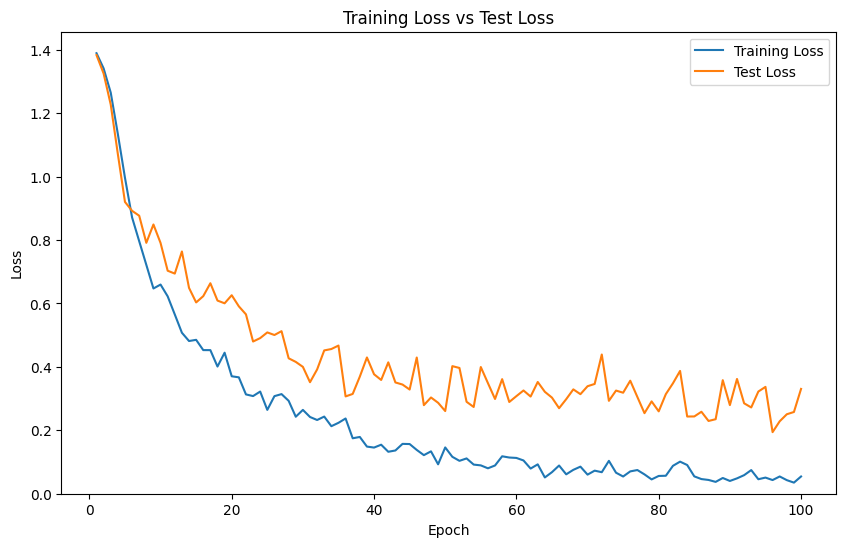

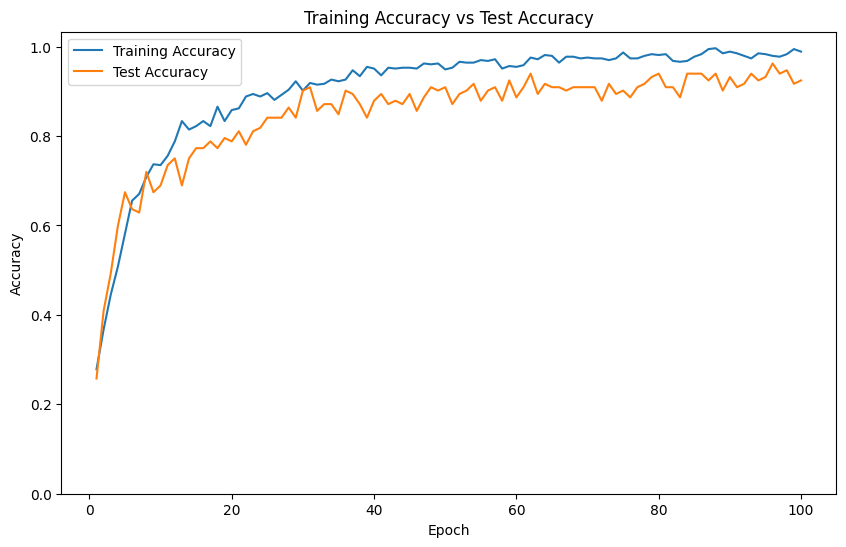

In [ ]:
import matplotlib.pyplot as plt

num_epochs = 100
num_batch_size = 32

history = model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test))

train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Test Loss')
plt.legend()
plt.ylim(bottom=0)  # Set y-axis to start from 0
plt.show()

# Plot training accuracy and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.legend()
plt.ylim(bottom=0)  # Set y-axis to start from 0
plt.show()


In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, Y_train)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, Y_test)
print("Testing Accuracy: ", score[1])

17/17 [==============================] - 1s 34ms/step - loss: 0.0057 - accuracy: 1.0000
Training Accuracy:  1.0
5/5 [==============================] - 0s 29ms/step - loss: 0.3304 - accuracy: 0.9242
Testing Accuracy:  0.9242424368858337


In [ ]:
def print_prediction(file_name):
    prediction_feature = extract_mfcc(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)
    predicted_vector = np.argmax(model.predict(prediction_feature),axis=-1)
    predicted_class = labelencoder.inverse_transform(predicted_vector) 
    predicted_class
    print("The predicted class is:", predicted_class[0], '\n') 



In [ ]:
filename = 'F_TEST.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 33ms/step
The predicted class is: F 



In [ ]:
filename = 'Z_test.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 47ms/step
The predicted class is: Z 



In [ ]:
filename = 'O_test.wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 47ms/step
The predicted class is: O 



In [ ]:
filename = 'L2test (2).wav' 
print_prediction(filename) 

1/1 [==============================] - 0s 90ms/step
The predicted class is: L 

